<a href="https://colab.research.google.com/github/Chetan3794/Heart-Disease-Prediction-Classification/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#Models import
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import xgboost as xgb


#constants
np.random.seed(0)
NFOLDS=5
SEED=0

In [2]:
file_path = 'data_cardiovascular_risk.csv'
risk = pd.read_csv(file_path)
risk=risk.drop(['id'], axis=1) #drop 'id'

In [3]:
#Display the FIRST 5 Observations
print('First 5 Observation')
print(risk.head())

First 5 Observation
   age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3 

In [4]:
#Display the LAST 5 Observations
print('Last 5 Observation')
print(risk.tail())

Last 5 Observation
      age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
3385   60        1.0   F         NO         0.0     0.0                0   
3386   46        1.0   F         NO         0.0     0.0                0   
3387   44        3.0   M        YES         3.0     0.0                0   
3388   60        1.0   M         NO         0.0     NaN                0   
3389   54        3.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
3385    103.0           0  
3386     84.0           0  
3

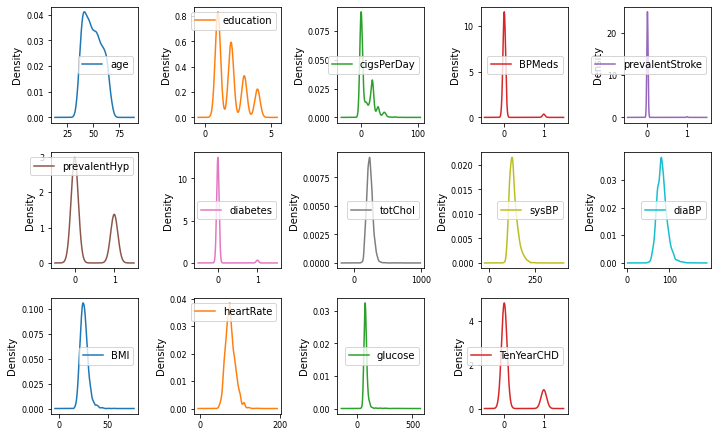

In [5]:
risk.plot(kind='density' , subplots=True , layout=(5,5) , sharex=False ,
          fontsize=8 , figsize=(10,10))
plt.tight_layout()
plt.title('Density map', y=1.1)
plt.show()


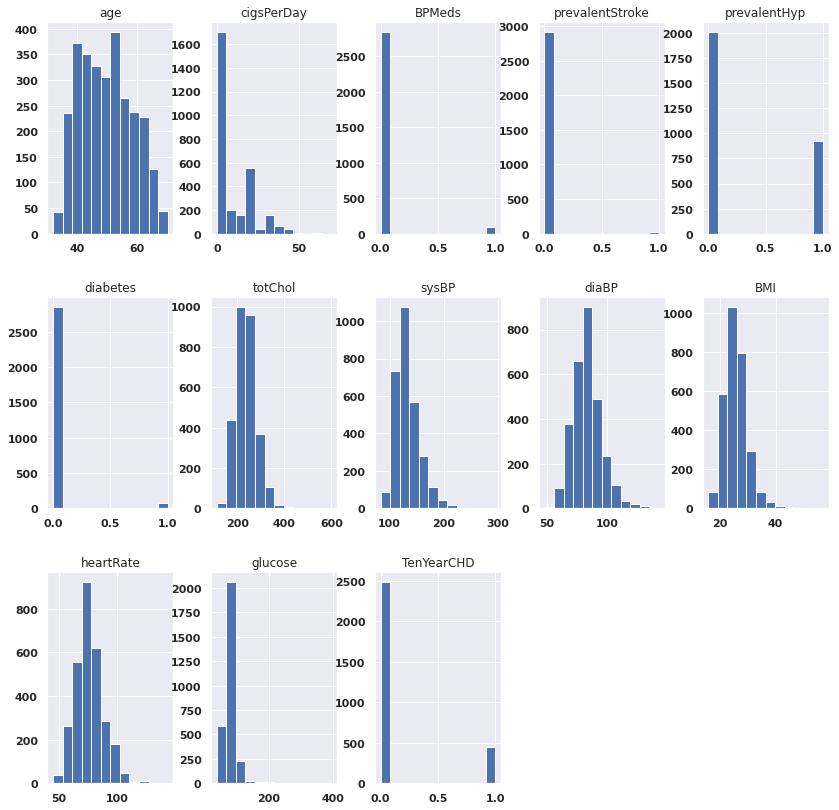

In [76]:
# Plotting the data distribution
import matplotlib.pyplot as mpl

mpl.rcParams['font.size'] = 6
risk.hist(figsize=(14, 14), layout=(3, 5), bins=12)
sns.set(font_scale=1)
plt.title('Features Histogram')
plt.show()

                      age  cigsPerDay    BPMeds  prevalentStroke  \
age              1.000000   -0.184110  0.138570         0.049756   
cigsPerDay      -0.184110    1.000000 -0.036866        -0.047461   
BPMeds           0.138570   -0.036866  1.000000         0.114107   
prevalentStroke  0.049756   -0.047461  0.114107         1.000000   
prevalentHyp     0.313543   -0.080570  0.260039         0.059703   
diabetes         0.111085   -0.048959  0.069443         0.013866   
totChol          0.281156   -0.026606  0.098210         0.002418   
sysBP            0.405238   -0.105104  0.280788         0.061712   
diaBP            0.231322   -0.067483  0.206209         0.059594   
BMI              0.141001   -0.095310  0.088962         0.029168   
heartRate        0.013947    0.055770  0.014681        -0.018617   
glucose          0.108882   -0.064029  0.069125         0.021427   
TenYearCHD       0.234423    0.059797  0.092868         0.052014   

                 prevalentHyp  diabetes   totCh

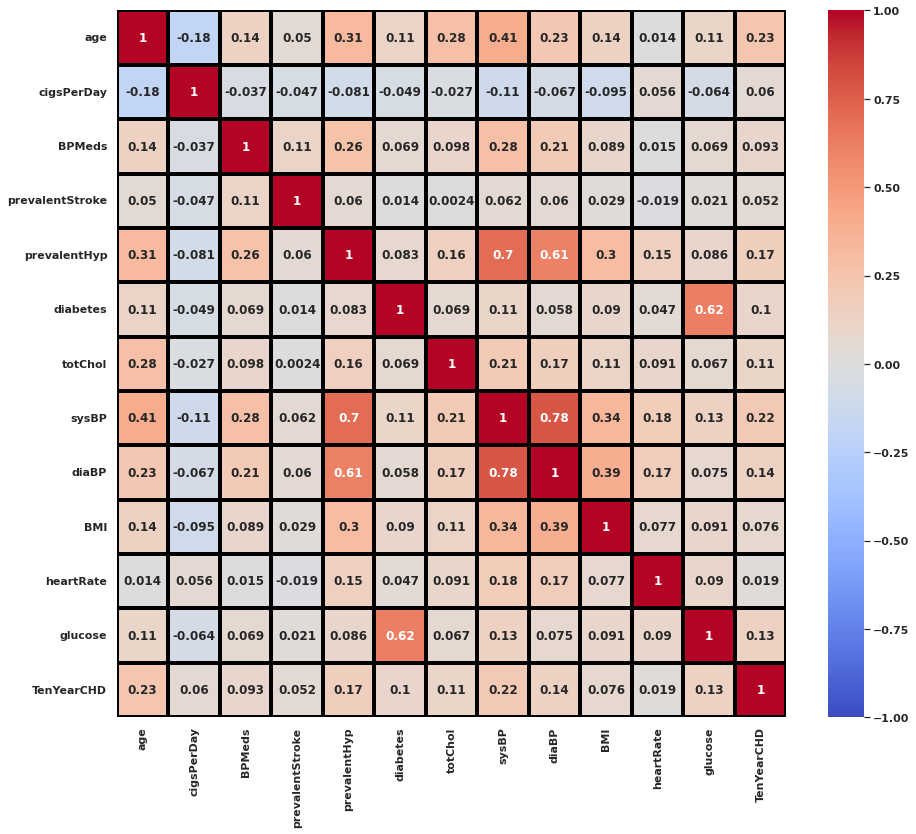

In [61]:

# find correlation between different pairs of columns
print(risk.corr())

# Correlation heatmap

plt.figure(figsize=(15, 13))
# sns.heatmap

sns.heatmap(risk.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=3, linecolor='black')
sns.set(font_scale=3)
plt.show()

In [8]:
#Display the Number of Variables & Number of Observations
print('Number of Variables')
print(risk.shape)

Number of Variables
(3390, 16)


In [9]:
#Display the Variable Names and their Data Types
print('Number of Variables Names and their Data Types')
print(risk.dtypes)

Number of Variables Names and their Data Types
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [10]:
risk.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [11]:
risk = risk.dropna(how ='any')

In [12]:
#Display the Number of Variables & Number of Observations
print('Number of Variables')
print(risk.shape)

Number of Variables
(2927, 16)


In [13]:
#prevalance in the data set
risk['TenYearCHD'].value_counts(normalize=True)

0    0.848309
1    0.151691
Name: TenYearCHD, dtype: float64

In [14]:
risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2927 non-null   int64  
 1   education        2927 non-null   float64
 2   sex              2927 non-null   object 
 3   is_smoking       2927 non-null   object 
 4   cigsPerDay       2927 non-null   float64
 5   BPMeds           2927 non-null   float64
 6   prevalentStroke  2927 non-null   int64  
 7   prevalentHyp     2927 non-null   int64  
 8   diabetes         2927 non-null   int64  
 9   totChol          2927 non-null   float64
 10  sysBP            2927 non-null   float64
 11  diaBP            2927 non-null   float64
 12  BMI              2927 non-null   float64
 13  heartRate        2927 non-null   float64
 14  glucose          2927 non-null   float64
 15  TenYearCHD       2927 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 388.7+ KB


In [15]:
risk.drop(labels = 'education', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
features = list(risk.columns)[1:-1]
X = risk[features]
y = risk['TenYearCHD']
X = pd.get_dummies(X,columns=['sex', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes'])
X.sample(5)

,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
2470,3.0,0.0,217.0,169.0,111.0,32.54,65.0,78.0,1,0,0,1,1,0,1,0,1,0
826,5.0,0.0,310.0,128.5,82.0,25.36,70.0,85.0,1,0,0,1,1,0,1,0,1,0
3139,0.0,0.0,186.0,155.0,102.0,24.38,81.0,75.0,1,0,1,0,1,0,0,1,1,0
2278,0.0,0.0,240.0,110.5,66.0,24.09,67.0,80.0,1,0,1,0,1,0,1,0,1,0
346,15.0,0.0,272.0,127.5,79.5,26.37,78.0,66.0,0,1,0,1,1,0,1,0,1,0


In [17]:
#Display the First 5 Observations
print('First 5 Observation')
print(X.head())

First 5 Observation
   cigsPerDay  BPMeds  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1         0.0     0.0    212.0  168.0   98.0  29.77       72.0     75.0   
2        10.0     0.0    250.0  116.0   71.0  20.35       88.0     94.0   
3        20.0     0.0    233.0  158.0   88.0  28.26       68.0     94.0   
4        30.0     0.0    241.0  136.5   85.0  26.42       70.0     77.0   
5         0.0     0.0    272.0  182.0  121.0  32.80       85.0     65.0   

   sex_F  sex_M  is_smoking_NO  is_smoking_YES  prevalentStroke_0  \
1      0      1              1               0                  1   
2      1      0              0               1                  1   
3      0      1              0               1                  1   
4      1      0              0               1                  1   
5      1      0              1               0                  1   

   prevalentStroke_1  prevalentHyp_0  prevalentHyp_1  diabetes_0  diabetes_1  
1                  0               

In [18]:
#Display the First 5 Observations
print('First 5 Observation')
print(y.head())

First 5 Observation
1    0
2    0
3    1
4    0
5    1
Name: TenYearCHD, dtype: int64


In [19]:
#Display the Number of Variables & Number of Observations
print('Number of Variables')
print(X.shape)

Number of Variables
(2927, 18)


In [20]:
#test-train split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.15, stratify= y , random_state = 42) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2487, 18)
(440, 18)
(2487,)
(440,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:

# DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
cmdt=confusion_matrix(y_test, pred)
# accuracy
accuracy_DT = accuracy_score(pred, y_test)*100
print("1.Decision Tree Accuracy")
print(accuracy_DT)
print("Decision Tree  classification_report")
print(classification_report(pred, y_test, labels=None))
print("Decision Tree  confusion_matrix")
print(cmdt)

1.Decision Tree Accuracy
73.18181818181819
Decision Tree  classification_report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       363
           1       0.19      0.17      0.18        77

    accuracy                           0.73       440
   macro avg       0.51      0.51      0.51       440
weighted avg       0.72      0.73      0.72       440

Decision Tree  confusion_matrix
[[309  64]
 [ 54  13]]


In [23]:
#Decision tree Classifier Hyperparameter tunning
DT= DecisionTreeClassifier()
DT_param = {'max_depth':np.arange(10,40,2), 'max_leaf_nodes':np.arange(50,150,10)}
DT = GridSearchCV(DT, param_grid= DT_param, scoring ='f1' , cv = 5)
DT.fit(X_train,y_train)
print(DT.best_params_)
DT = DT.best_estimator_

{'max_depth': 18, 'max_leaf_nodes': 130}


In [24]:
y_pred_test_DT = DT.predict(X_test)
y_pred_train_DT = DT.predict(X_train)
print("1.Decision Tree Accuracy with hypertuning")
print('f1 score on train set:',f1_score(y_train,y_pred_train_DT) )

print('Auc_score Train:', roc_auc_score(y_train,y_pred_train_DT))
# Recall is an important metric in this case
print('Recall Score:', recall_score(y_test,y_pred_test_DT))
# Since its binary classiffication, lets check the confusion matrix

print('Confusion matrix model\n', confusion_matrix(y_test,y_pred_test_DT,labels=[1,0]) + confusion_matrix(y_train,y_pred_train_DT,labels=[1,0]))

1.Decision Tree Accuracy with hypertuning
f1 score on train set: 0.7003367003367003
Auc_score Train: 0.7737293675437164
Recall Score: 0.16417910447761194
Confusion matrix model
 [[ 219  225]
 [  44 2439]]


In [25]:
# RandomForestClassifier
rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred = rdF.predict(X_test)
accuracy_RF = accuracy_score(pred, y_test)*100
cmrf=confusion_matrix(y_test, pred)
print("2.Random Forest Accuracy")
print(accuracy_RF)
print("Random Forest classification_report")
print(classification_report(pred, y_test, labels=None))
print("Random Forest confusion_matrix")
print(cmrf)

2.Random Forest Accuracy
84.0909090909091
Random Forest classification_report
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       433
           1       0.03      0.29      0.05         7

    accuracy                           0.84       440
   macro avg       0.51      0.57      0.48       440
weighted avg       0.97      0.84      0.90       440

Random Forest confusion_matrix
[[368   5]
 [ 65   2]]


In [26]:
#XGBClassifier
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)
pred=xgb_clf.predict(X_test)
cmxg=confusion_matrix(y_test, pred)

accuracy_XGB = accuracy_score(y_test,pred)*100
print("3. XGBClassifier Accuracy")
print(accuracy_XGB)
print("XGBClassifier classification_report")
print(classification_report(pred, y_test, labels=None))
print("XGBClassifier confusion_matrix")
print(cmxg)

3. XGBClassifier Accuracy
84.31818181818181
XGBClassifier classification_report
              precision    recall  f1-score   support

           0       0.98      0.86      0.91       428
           1       0.07      0.42      0.13        12

    accuracy                           0.84       440
   macro avg       0.53      0.64      0.52       440
weighted avg       0.96      0.84      0.89       440

XGBClassifier confusion_matrix
[[366   7]
 [ 62   5]]


In [27]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred=clf.predict(X_test)
cmlr=confusion_matrix(y_test, pred)

accuracy_LR = accuracy_score(y_test,pred)*100
print("4. Logistic Regression Accuracy")
print(accuracy_LR)
print("Logistic Regression classification_report")
print(classification_report(pred, y_test, labels=None))
print("Logistic Regression confusion_matrix")
print(cmlr)

4. Logistic Regression Accuracy
84.54545454545455
Logistic Regression classification_report
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       437
           1       0.01      0.33      0.03         3

    accuracy                           0.85       440
   macro avg       0.50      0.59      0.47       440
weighted avg       0.99      0.85      0.91       440

Logistic Regression confusion_matrix
[[371   2]
 [ 66   1]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


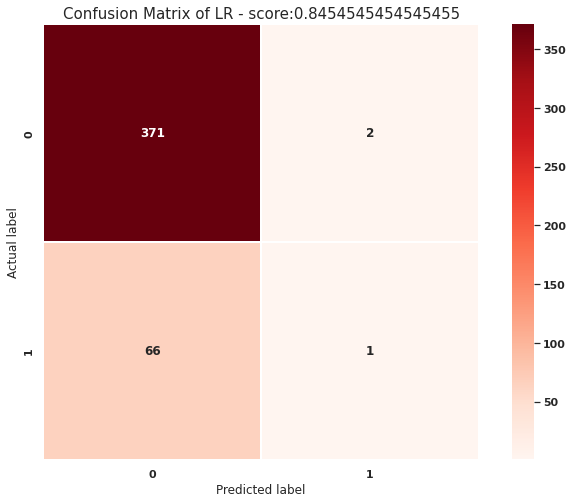

In [77]:
from sklearn.metrics import confusion_matrix
cmlr=confusion_matrix(y_test, pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cmlr, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label',size=12);
plt.xlabel('Predicted label', size=12);
all_sample_title = 'Confusion Matrix of LR - score:'+str(accuracy_score(y_test,pred))
plt.title(all_sample_title, size = 15);
sns.set(font_scale=0.2)
plt.show()

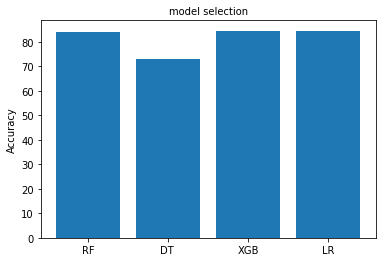

In [45]:
from numpy.ma.core import size
labels = ["RF","DT ", "XGB", "LR"]
usages = [accuracy_RF,accuracy_DT,accuracy_XGB,accuracy_LR]

y_positions = range(len(labels))
plt.bar(y_positions,usages)
plt.xticks(y_positions, labels)
plt.ylabel("Accuracy", size=10)
plt.title("model selection", size=10)
plt.rcParams.update({'font.size': 2})
plt.show()